In [1]:
import datetime
import pandas as pd
import numpy as np

from pybaseball import schedule_and_record, batting_stats, pitching_stats


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

#-----
# set styles

mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2

mpl.rcParams['pdf.fonttype'] = 42 # allegedly allows text to be saved as editable

mpl.rcParams['font.sans-serif'] = ['Arial Narrow']
mpl.rcParams['font.size'] = 9
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

import warnings
warnings.filterwarnings("ignore")

plt.style.use(['ggplot'])
# prints list of available seaborn styles
#print(plt.style.available)

from scipy.stats import norm

print('ready')

ready


In [2]:
data = pitching_stats(2018)
soxPS = pd.DataFrame( data.loc[ ( data["Team"] == "White Sox") ] )
soxPS

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
92,2018.0,Reynaldo Lopez,White Sox,24.0,0.0,2.0,1.42,0.3,3.0,3.0,...,6.80,NaN,0.197,0.656,0.436,0.571,0.782,0.736,0.520,24.4
127,2018.0,Nate Jones,White Sox,32.0,1.0,0.0,2.08,0.2,4.0,0.0,...,2.75,NaN,0.364,0.659,0.527,0.333,0.852,0.692,0.554,24.1
245,2018.0,James Shields,White Sox,36.0,1.0,0.0,4.15,0.2,3.0,3.0,...,-5.63,NaN,0.324,0.651,0.448,0.690,0.873,0.791,0.379,24.6
122,2018.0,Aaron Bummer,White Sox,24.0,0.0,0.0,1.93,0.2,8.0,0.0,...,-9.43,NaN,0.400,0.696,0.528,0.583,0.875,0.750,0.434,23.9
10,2018.0,Bruce Rondon,White Sox,27.0,1.0,0.0,0.00,0.1,2.0,0.0,...,11.07,NaN,0.550,0.688,0.611,0.364,0.818,0.591,0.444,21.4
248,2018.0,Luis Avilan,White Sox,28.0,0.0,0.0,4.15,0.1,7.0,0.0,...,NaN,NaN,0.250,0.646,0.440,0.539,0.871,0.773,0.480,24.5
314,2018.0,Lucas Giolito,White Sox,23.0,0.0,2.0,5.50,0.1,3.0,3.0,...,-0.62,NaN,0.206,0.635,0.395,0.636,0.863,0.797,0.441,26.8
318,2018.0,Carson Fulmer,White Sox,24.0,0.0,1.0,5.59,0.1,2.0,2.0,...,NaN,NaN,0.313,0.578,0.424,0.710,0.902,0.819,0.418,28.2
161,2018.0,Danny Farquhar,White Sox,31.0,1.0,1.0,2.57,0.0,6.0,0.0,...,NaN,NaN,0.424,0.762,0.564,0.520,0.844,0.702,0.416,20.4
350,2018.0,Joakim Soria,White Sox,34.0,0.0,0.0,6.75,0.0,4.0,0.0,...,-10.75,NaN,0.231,0.742,0.422,0.500,0.783,0.686,0.374,25.9


In [3]:
soxPS.to_csv("csv/soxpitch.csv", index=False, encoding="utf-8")


In [2]:
soxhit = pd.read_csv('csv/soxhit.csv', index_col=None)


In [3]:
soxhit.head()

,Name,AB,R,H,dbls,trps,HR,RBI,BB,SO,...,wOBA,wRAA,RAR,WAR,Fld,SOperc,lastname,posName,posnum,position
0,Matt Davidson,41,10,8,1,0,5,10,10,18,...,0.407,3.9,3.7,0.4,NaN,43.9,Davidson,Matt Davidson,24,DH
1,Yolmer Sanchez,41,3,12,1,2,1,9,2,9,...,0.352,1.5,4.1,0.4,1.5,22.0,Sanchez,Yolmer Sanchez,5,Third base
2,Tim Anderson,48,8,12,1,0,3,4,4,16,...,0.336,1.0,4.2,0.4,-0.7,33.3,Anderson,Tim Anderson,7,Short stop
3,Yoan Moncada,52,6,10,3,0,1,3,8,26,...,0.280,-1.5,3.3,0.3,1.1,50.0,Moncada,Yoan Moncada,10,Second base
4,Jose Abreu,52,7,13,2,0,4,7,2,10,...,0.370,2.6,1.8,0.2,-0.5,19.2,Abreu,Jose Abreu,79,First base


done


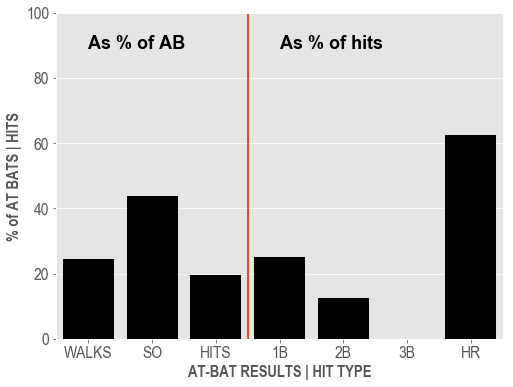

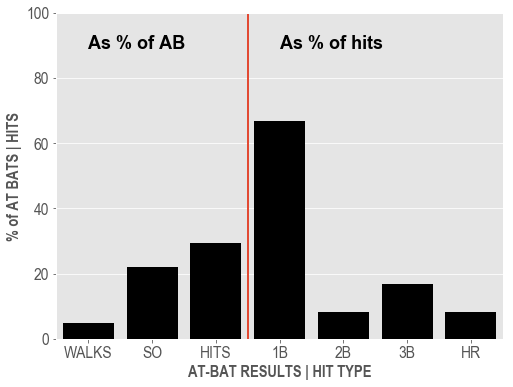

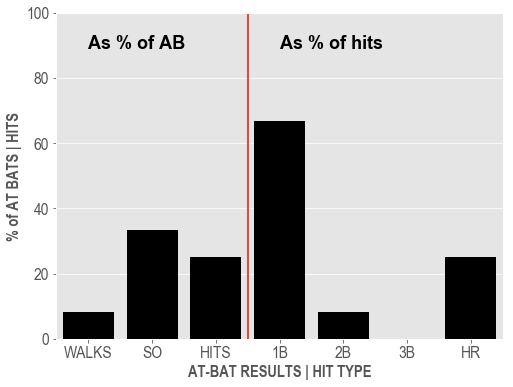

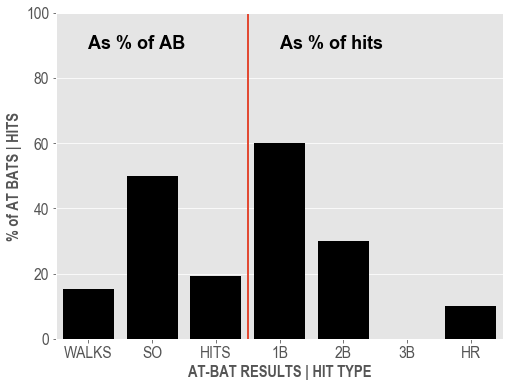

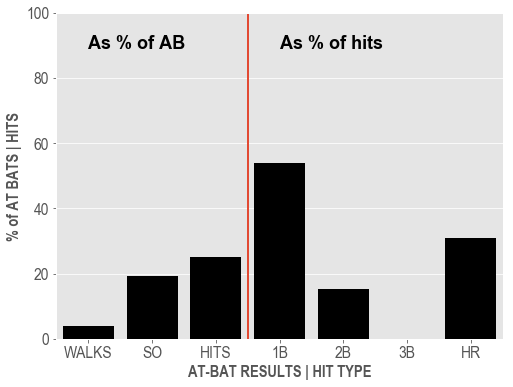

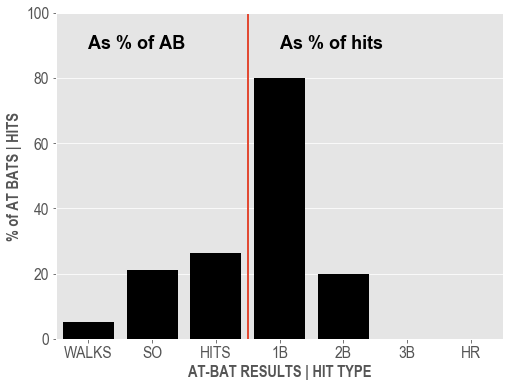

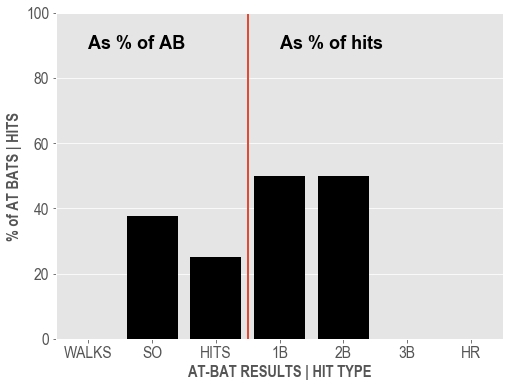

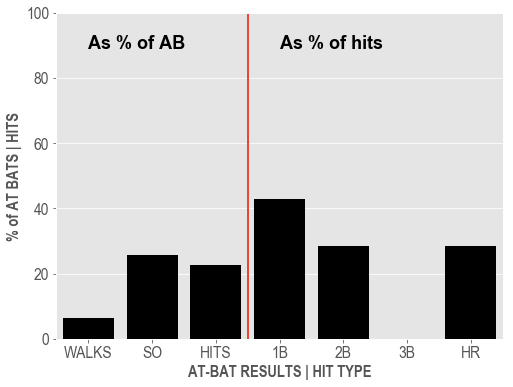

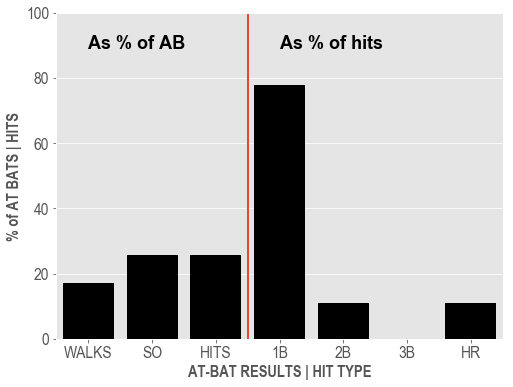

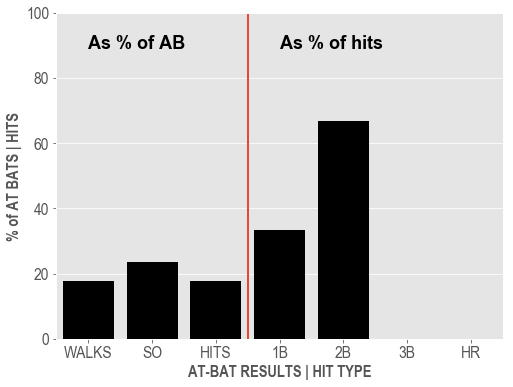

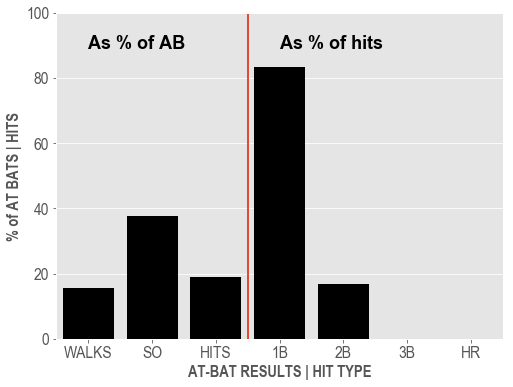

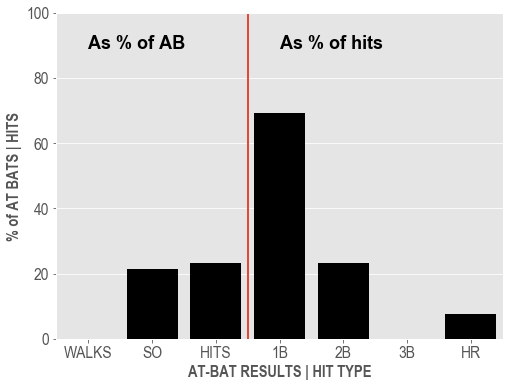

In [83]:
for index, row in soxhit.iterrows():
    d = {'hits': ['WALKS','SO','HITS','1B', '2B', '3B', 'HR']}
    df = pd.DataFrame(data=d)
    df['hitperc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    if ( row.H == 0):
        junkvar = []
    else:
        df['hitperc'][0] = np.round( (row.BB / row.AB)*100,1 )
        df['hitperc'][1] = np.round( (row.SO / row.AB)*100,1 )
        df['hitperc'][2] = np.round( (row.H / row.AB)*100,1 )
        onebs = row.H - ( row.dbls + row.trps + row.HR )
        df['hitperc'][3] = np.round( (onebs / row.H)*100,1 )
        df['hitperc'][4] = np.round( (row.dbls / row.H)*100,1 )
        df['hitperc'][5] = np.round( (row.trps / row.H)*100,1 )
        df['hitperc'][6] = np.round( (row.HR / row.H)*100,1 )
    # start the plot
    plt.figure()
    my_dpi=150
    plt.ylim(0, 100)
    g = sns.barplot(
        x='hits',
        y='hitperc',
        data=df,
        color="black"
    )
    g.figure.set_size_inches(8,6)
    plt.plot([2.5, 2.5], [0, 100], linewidth=2)
    # Add labels to the plot
    style = dict(fontsize=18, family='Arial', fontweight='bold', color='black')
    plt.text(0, 89, "As % of AB", **style)
    plt.text(3, 89, "As % of hits", **style)
    g.set_ylabel('% of AT BATS | HITS', fontsize=16, fontweight='bold')
    g.set_xlabel('AT-BAT RESULTS | HIT TYPE', fontsize=16, fontweight='bold')
    g.figure.savefig('static/img/sox' + str( row.lastname ) + str( row.posnum ) + '.png',bbox_inches='tight')

print('done')

In [4]:
d = {'hits': ['WALKS','SO','HITS','1B', '2B', '3B', 'HR']}
df = pd.DataFrame(data=d)
df['hitperc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]

df

,hits,hitperc
0,WALKS,0.0
1,SO,0.0
2,HITS,0.0
3,1B,0.0
4,2B,0.0
5,3B,0.0
6,HR,0.0


In [5]:
if ( soxhit['H'][0] == 0):
    junkvar = []
else:
    df['hitperc'][0] = np.round( (soxhit['BB'][0] / soxhit['AB'][0])*100,1 )
    df['hitperc'][1] = np.round( (soxhit['SO'][0] / soxhit['AB'][0])*100,1 )
    df['hitperc'][2] = np.round( (soxhit['H'][0] / soxhit['AB'][0])*100,1 )
    onebs = soxhit['H'][0] - ( soxhit['dbls'][0] + soxhit['trps'][0] + soxhit['HR'][0] )
    df['hitperc'][3] = np.round( (onebs / soxhit['H'][0])*100,1 )
    df['hitperc'][4] = np.round( (soxhit['dbls'][0] / soxhit['H'][0])*100,1 )
    df['hitperc'][5] = np.round( (soxhit['trps'][0] / soxhit['H'][0])*100,1 )
    df['hitperc'][6] = np.round( (soxhit['HR'][0] / soxhit['H'][0])*100,1 )
df

,hits,hitperc
0,WALKS,24.4
1,SO,43.9
2,HITS,19.5
3,1B,25.0
4,2B,12.5
5,3B,0.0
6,HR,62.5


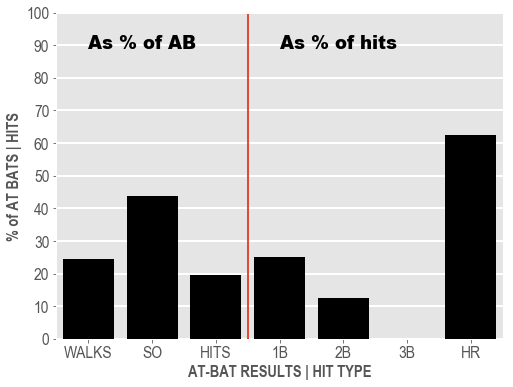

In [10]:
# bar plot
plt.figure()
my_dpi=150
plt.ylim(0, 100)
#sns.set_style( {'ytick.major.size': 0.0,'ytick.minor.size': 0.0} )
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(10)
g = sns.barplot(
    x='hits',
    y='hitperc',
    data=df,
    color="black"
)

g.yaxis.set_major_locator(tick_locator)
g.grid(axis='y', linewidth=2)
g.figure.set_size_inches(8,6)
plt.plot([2.5, 2.5], [0, 100], linewidth=2)
# Add labels to the plot
style = dict(fontsize=18, family='Arial Black', color='black')
plt.text(0, 89, "As % of AB", **style)
plt.text(3, 89, "As % of hits", **style)
g.set_ylabel('% of AT BATS | HITS', fontsize=16, fontweight='bold')
g.set_xlabel('AT-BAT RESULTS | HIT TYPE', fontsize=16, fontweight='bold')

#g.figure.savefig('static/img/HR.png',bbox_inches='tight')


In [2]:
data = batting_stats(2018)

In [33]:
soxBS = pd.DataFrame( data.loc[ ( data["Team"] == "White Sox") ] )
soxBSselect = soxBS[['Name','AB','R','H','2B','3B','HR','RBI','BB','SO','SB','CS','AVG','OBP','SLG','wOBA','wRAA','RAR','WAR','Fld']]
soxBSselect = soxBSselect.copy()
soxBSselect.loc[:,'SOperc'] = np.round( (soxBSselect['SO'] / soxBSselect['AB'] )*100,1 )
soxBSselect['last'] = soxBSselect['Name'].str.split(' ').str[1]
soxBSselect.loc[:, 'AB'] = soxBSselect['AB'].astype(int)
soxBSselect.loc[:, 'R'] = soxBSselect['R'].astype(int)
soxBSselect.loc[:, 'H'] = soxBSselect['H'].astype(int)
soxBSselect.loc[:, '2B'] = soxBSselect['2B'].astype(int)
soxBSselect.loc[:, '3B'] = soxBSselect['3B'].astype(int)
soxBSselect.loc[:, 'HR'] = soxBSselect['HR'].astype(int)
soxBSselect.loc[:, 'RBI'] = soxBSselect['RBI'].astype(int)
soxBSselect.loc[:, 'BB'] = soxBSselect['BB'].astype(int)
soxBSselect.loc[:, 'SO'] = soxBSselect['SO'].astype(int)
soxBSselect.loc[:, 'CS'] = soxBSselect['CS'].astype(int)
soxBSselect = soxBSselect.rename(columns = {'2B':'dbls','3B':'trps' })
soxBSselect.to_csv("csv/soxhit.csv", index=False, encoding="utf-8")
print("Sox batting stats done")

,Name,AB,R,H,dbls,trps,HR,RBI,BB,SO,...,AVG,OBP,SLG,wOBA,wRAA,RAR,WAR,Fld,SOperc,last
134,Tim Anderson,45,8,12,1,0,3,4,4,16,...,0.267,0.327,0.489,0.356,1.7,4.9,0.5,-0.7,35.6,Anderson
58,Matt Davidson,38,10,8,1,0,5,10,9,16,...,0.211,0.375,0.632,0.427,4.3,4.1,0.4,NaN,42.1,Davidson
135,Yolmer Sanchez,38,3,11,1,2,1,9,2,9,...,0.289,0.341,0.500,0.356,1.5,4.0,0.4,1.5,23.7,Sanchez
280,Yoan Moncada,49,6,9,3,0,1,3,8,24,...,0.184,0.298,0.306,0.279,-1.5,3.1,0.3,1.1,49.0,Moncada
176,Leury Garcia,18,3,5,1,0,0,2,1,4,...,0.278,0.381,0.333,0.332,0.3,2.2,0.2,0.9,22.2,Garcia
117,Nick Delmonico,32,3,9,1,0,1,3,6,9,...,0.281,0.410,0.406,0.371,1.8,1.0,0.1,-1.2,28.1,Delmonico
131,Jose Abreu,48,6,12,2,0,3,6,2,9,...,0.250,0.333,0.479,0.358,2.0,1.1,0.1,-0.5,18.8,Abreu
293,Tyler Saladino,8,1,2,1,0,0,0,0,3,...,0.250,0.250,0.375,0.270,-0.3,0.7,0.1,0.8,37.5,Saladino
181,Welington Castillo,28,3,6,2,0,2,4,2,7,...,0.214,0.267,0.500,0.330,0.4,0.1,0.0,-1.0,25.0,Castillo
262,Omar Narvaez,16,0,3,2,0,0,1,3,3,...,0.188,0.316,0.313,0.290,-0.3,0.2,0.0,0.0,18.8,Narvaez


In [6]:
soxhit = pd.read_csv('csv/soxhit.csv', index_col=None)
soxroster = pd.read_csv('csv/soxroster.csv', index_col=None)
left = soxhit
right = soxroster
soxjoin = pd.merge(left, right, how='left', left_on='Name', right_on='posName', suffixes=('_x', '_y'))
soxjoin

,Name,AB,R,H,dbls,trps,HR,RBI,BB,SO,...,wOBA,wRAA,RAR,WAR,Fld,SOperc,last,posName,posnum,position
0,Tim Anderson,45,8,12,1,0,3,4,4,16,...,0.356,1.7,4.9,0.5,-0.7,35.6,Anderson,Tim Anderson,7,Short stop
1,Matt Davidson,38,10,8,1,0,5,10,9,16,...,0.427,4.3,4.1,0.4,NaN,42.1,Davidson,Matt Davidson,24,DH
2,Yolmer Sanchez,38,3,11,1,2,1,9,2,9,...,0.356,1.5,4.0,0.4,1.5,23.7,Sanchez,Yolmer Sanchez,5,Third base
3,Yoan Moncada,49,6,9,3,0,1,3,8,24,...,0.279,-1.5,3.1,0.3,1.1,49.0,Moncada,Yoan Moncada,10,Second base
4,Leury Garcia,18,3,5,1,0,0,2,1,4,...,0.332,0.3,2.2,0.2,0.9,22.2,Garcia,Leury Garcia,28,Outfield
5,Nick Delmonico,32,3,9,1,0,1,3,6,9,...,0.371,1.8,1.0,0.1,-1.2,28.1,Delmonico,Nick Delmonico,30,Outfield
6,Jose Abreu,48,6,12,2,0,3,6,2,9,...,0.358,2.0,1.1,0.1,-0.5,18.8,Abreu,Jose Abreu,79,First base
7,Tyler Saladino,8,1,2,1,0,0,0,0,3,...,0.270,-0.3,0.7,0.1,0.8,37.5,Saladino,Tyler Saladino,20,Infield
8,Welington Castillo,28,3,6,2,0,2,4,2,7,...,0.330,0.4,0.1,0.0,-1.0,25.0,Castillo,Welington Castillo,21,Catcher
9,Omar Narvaez,16,0,3,2,0,0,1,3,3,...,0.290,-0.3,0.2,0.0,0.0,18.8,Narvaez,Omar Narvaez,38,Catcher


(12, 27)

In [2]:
cubs = schedule_and_record(2018, 'CHC')

print('ready')

ready


In [4]:
cubs.head(15)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Thursday, Mar 29",CHC,@,MIA,W,8.0,4.0,9.0,1-0,1.0,Tied,Cishek,Urena,None,3:18,D,32151.0,1.0,None
2,"Friday, Mar 30",CHC,@,MIA,L-wo,1.0,2.0,17.0,1-1,3.0,1.0,Despaigne,Butler,None,5:18,N,12034.0,-1.0,None
3,"Saturday, Mar 31",CHC,@,MIA,W,10.0,6.0,10.0,2-1,2.0,1.0,Strop,Ziegler,None,3:57,N,13422.0,1.0,None
4,"Sunday, Apr 1",CHC,@,MIA,L,0.0,6.0,9.0,2-2,3.0,1.5,Peters,Quintana,None,2:36,D,10428.0,-1.0,None
5,"Monday, Apr 2",CHC,@,CIN,L,0.0,1.0,9.0,2-3,4.0,2.5,Mahle,Chatwood,Iglesias,2:33,D,18963.0,-2.0,None
6,"Thursday, Apr 5",CHC,@,MIL,W,8.0,0.0,9.0,3-3,3.0,2.0,Lester,Suter,None,2:52,N,24310.0,1.0,None
7,"Friday, Apr 6",CHC,@,MIL,L-wo,4.0,5.0,9.0,3-4,3.0,3.0,Albers,Montgomery,None,3:45,N,37758.0,-1.0,None
8,"Saturday, Apr 7",CHC,@,MIL,W,5.0,2.0,9.0,4-4,3.0,2.0,Strop,Barnes,Morrow,3:26,D,43331.0,1.0,None
9,"Sunday, Apr 8",CHC,@,MIL,W,3.0,0.0,9.0,5-4,2.0,2.0,Quintana,Anderson,Morrow,2:41,D,39282.0,2.0,None
10,"Tuesday, Apr 10",CHC,Home,PIT,L,5.0,8.0,9.0,5-5,2.0,3.0,Nova,Chatwood,Vazquez,3:05,D,40144.0,-1.0,None


In [2]:
bballJoin = pd.read_csv('csv/bballJoin.csv', index_col=None)


In [3]:
print('Get Sox sched stuff')
sox = schedule_and_record(2018, 'CHW')
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='R', ascending=False).reset_index(drop=True)
soxnextlast.to_csv("csv/soxnextlast.csv", index=False, encoding="utf-8")
print('Last and next sox games saved')
# Now aggregate results by team
# get df of teams played
soxteams = []
for name,grouped in soxsort.groupby(['Opp']):
    dlist = list([name])
    soxteams.append(dlist)
df = pd.DataFrame(data = soxteams, columns=['Team'])
# now aggregate results
soxlist = []
for team in df['Team']:
    # Link team in df to soxteams list in teamlist
    opp = soxsort['Opp'] == team
    df1 = soxsort[opp]
    # get wins and losses
    w = df1['W/L'] == 'W'
    wins = len( df1[w] )
    l = df1['W/L'] == 'L'
    loses = len( df1[l] )
    # average runs/against
    rAvg = np.round( df1['R'].mean() ,2)
    raAvg = np.round( df1['RA'].mean() ,2)
    # append to empty list
    slist = list([team,wins,loses,rAvg,raAvg])
    soxlist.append(slist)
# bring list into dataframe and name columns
soxagainst = pd.DataFrame(data = soxlist, columns=['teamID','Wins','Loses','AvgRuns','AvgRunsAg'])
# join aggregated list with team names
left = soxagainst
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='teamID', right_on='tres', suffixes=('_x', '_y'))
soxagg.to_csv("csv/soxagg.csv", index=False, encoding="utf-8")
print("Sox aggregate done")

Get Sox sched stuff
Last and next sox games saved
Sox aggregate done


In [3]:
print('Get Sox sched stuff')
sox = schedule_and_record(2018, 'CHW')

Get Sox sched stuff


In [10]:
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxlast = soxlast.copy()
soxlast.loc[:, 'R'] = soxlast['R'].astype(int)
soxlast.loc[:, 'R'] = soxlast['R'].astype(str)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(int)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(str)
soxlast.dtypes

Date                object
Tm                  object
Home_Away           object
Opp                 object
W/L                 object
R                   object
RA                  object
Inn                float64
W-L                 object
Rank               float64
GB                  object
Win                 object
Loss                object
Save                object
Time                object
D/N                 object
Attendance         float64
Streak             float64
Orig. Scheduled     object
dtype: object

In [11]:
soxlast.shape

(1, 19)

In [21]:
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='R', ascending=False).reset_index(drop=True)
soxnextlast.head()

,Date,teamID,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,D/N,Attendance,Streak,Orig. Scheduled,Team,Tm,League,Division,color,tres
0,"Thursday, Apr 12",CHW,@,MIN,L,0,4,9.0,4-8,3.0,...,N,15474.0,-1.0,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
1,"Sunday, Apr 15",CHW,@,MIN,None,NaN,NaN,NaN,None,NaN,...,None,NaN,NaN,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN


In [107]:
sox = schedule_and_record(2018, 'CHW')
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:1]
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:1]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID'})
left = soxlast
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxagg = soxagg.sort_values(by='R', ascending=False).reset_index(drop=True)
soxagg

,Date,teamID,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,D/N,Attendance,Streak,Orig. Scheduled,Team,Tm,League,Division,color,tres
0,"Thursday, Apr 12",CHW,@,MIN,L,0.0,4.0,9.0,4-8,3.0,...,N,15474.0,-1.0,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
1,"Sunday, Apr 15",CHW,@,MIN,None,NaN,NaN,NaN,None,NaN,...,None,NaN,NaN,None,Twins,Minnesota Twins,American,Central,#6B8E23,MIN


In [109]:
# get df of teams
soxteams = []
for name,grouped in soxsort.groupby(['Opp']):
    dlist = list([name])
    soxteams.append(dlist)
df = pd.DataFrame(data = soxteams, columns=['Team'])
df

,Team
0,DET
1,KCR
2,MIN
3,TBR
4,TOR


In [78]:
# now aggregate results

# create empty list
soxlist = []
for team in df['Team']:
    # Link team in df to soxteams list in teamlist
    opp = sox['Opp'] == team
    df1 = sox[opp]
    
    # get wins and losses
    w = df1['W/L'] == 'W'
    wins = len( df1[w] )
    l = df1['W/L'] == 'L'
    loses = len( df1[l] )
    
    # average runs/against
    rAvg = np.round( df1['R'].mean() ,2)
    raAvg = np.round( df1['RA'].mean() ,2)
    
    slist = list([team,wins,loses,rAvg,raAvg])
    soxlist.append(slist)
soxagainst = pd.DataFrame(data = soxlist, columns=['teamID','Wins','Loses','AvgRuns','AvgRunsAg'])
soxagainst

,teamID,Wins,Loses,AvgRuns,AvgRunsAg
0,DET,0,3,2.67,5.33
1,KCR,2,0,9.00,5.00
2,MIN,0,1,0.00,4.00
3,TBR,1,2,3.67,4.00
4,TOR,1,2,3.67,7.00


In [79]:
left = soxagainst
right = bballJoin
soxagg = pd.merge(left, right, how='left', left_on='teamID', right_on='tres', suffixes=('_x', '_y'))
soxagg

,teamID,Wins,Loses,AvgRuns,AvgRunsAg,Team,Tm,League,Division,color,tres
0,DET,0,3,2.67,5.33,Tigers,Detroit Tigers,American,Central,#6B8E23,DET
1,KCR,2,0,9.00,5.00,Royals,Kansas City Royals,American,Central,#6B8E23,KCR
2,MIN,0,1,0.00,4.00,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
3,TBR,1,2,3.67,4.00,Rays,Tampa Bay Rays,American,East,#6B8E23,TBR
4,TOR,1,2,3.67,7.00,Blue Jays,Toronto Blue Jays,American,East,#6B8E23,TOR


In [9]:
sox.dtypes

Date                object
Tm                  object
Home_Away           object
Opp                 object
W/L                 object
R                  float64
RA                 float64
Inn                float64
W-L                 object
Rank               float64
GB                  object
Win                 object
Loss                object
Save                object
Time                object
D/N                 object
Attendance         float64
Streak             float64
Orig. Scheduled     object
dtype: object

In [10]:
sox.shape

(12, 19)

In [22]:
sox[:1]
#soxlast=pd.DataFrame( sox.iloc[0] )
#soxlast

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
12,"Thursday, Apr 12",CHW,@,MIN,L,0.0,4.0,9.0,4-8,3.0,3.5,Berrios,Giolito,None,2:55,N,15474.0,-1.0,None
